In [1]:
!pip install tld -q

import re # regex
from urllib.parse import urlparse
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (10, 6)


# import os
# for dirname, _, filenames in os.walk('/Data'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [2]:
url_df = pd.read_csv("malicious_phish.csv")
url_df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
# Check for missing values and data types
print(url_df.info())

# Check the distribution of classes
print(url_df['type'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB
None
type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64


## Feature Extraction

In [4]:
#Install library for tokenization of URLs
!pip install url_parser

!pip install chardet

!pip install tldextract

#### 1. Get the length of domain name

In [5]:
# *** omit the (www.) from the URL which is in fact a sub domain in itself. ***
#url_df['url'] = url_df['url'].replace('www', '', regex=True)
url_df['url_length'] = url_df['url'].apply(len)


url_df.sample(10)

,url,type,url_length
106112,mahalo.com/bonnie-raitt/,benign,24
246790,sivutsastars.co.za/articles/111025_Preview_FCA...,benign,51
24249,facebook.com/jean.rodrigue1,benign,27
496206,biz.yahoo.com/e/111103/gxp10-q.html,benign,35
506725,sports.jrank.org/pages/567/Bossy-Mike.html,benign,42
526859,http://advonationusa.com/wp-image/1/customer_c...,phishing,257
509420,jeanfrancoislesage.com/english/history.htm,benign,42
242845,http://annviviskennel.net/index.php?view=artic...,defacement,138
176452,tweetmeme.com/story/511927453/nude-celebrity-v...,benign,185
197978,chadblack.com/,benign,14


#### 2. Protocal & Domain

In [6]:
from IPython.display import display
import tldextract

# Function to extract protocol
def extract_protocol(url):
    try:
        res = tldextract.extract(url)
        return res.scheme
    except Exception as e:
        print(f"Error extracting protocol from URL '{url}': {str(e)}")
        return 'Not_Found'

# Function to extract domain
def extract_domain(url):
    try:
        res = tldextract.extract(url)
        return res.domain
    except Exception as e:
        print(f"Error extracting domain from URL '{url}': {str(e)}")
        return 'Not_Found'

# Apply the functions to create new columns
url_df['protocol'] = url_df['url'].apply(extract_protocol)
url_df['domain'] = url_df['url'].apply(extract_domain)

# Display the entire DataFrame using display()
#display(url_df)

#url_df.sample(10)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Error extracting protocol from URL 'www.theregister.co.uk/2002/04/01/cumulative_ie_patch_for_malicious/': 'ExtractResult' object has no attribute 'scheme'
Error extracting protocol from URL 'www.theregister.co.uk/2002/03/04/ie_outlook_run_malicious_commands/': 'ExtractResult' object has no attribute 'scheme'
Error extracting protocol from URL 'www.theregister.co.uk/2002/04/02/ms_security_patch_fails/': 'ExtractResult' object has no attribute 'scheme'
Error extracting protocol from URL 'blog.washingtonpost.com/securityfix/2007/01/internet_explorer_unsafe_for_2.html': 'ExtractResult' object has no attribute 'scheme'
Error extracting protocol from URL 'news.cnet.com/2100-1001-214620.html': 'ExtractResult' object has no attribute 'scheme'
Error extracting protocol from URL 'www.wired.com/science/discoveries/news/2001/04/42798': 'ExtractResult' object has no attribute 'scheme'
Error extracting protocol from URL 'www.wired.com/science/discoveries/news/2001/03/42750': 'ExtractResult' object h

In [7]:
# # Countplot
# ax = sns.countplot(data=url_df, x='protocol', palette='tab20', order=url_df['protocol'].value_counts().index)

# # Annotate each bar with its count
# for p, label in zip(ax.patches, url_df['protocol'].value_counts()):
#     ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
#                 xytext=(0, 10), textcoords='offset points')

# # Set plot title and show the plot
# ax.set_title('Countplot of Protocol Variable: Protocol')
# plt.show()

#### 3. Converting type column into categorical column with following mappings:

1. Benign: 0
2. Defacement: 1
3. Malware: 2
4. Phishing: 3

In [8]:
# Check for missing values in 'type' column
if url_df['type'].isnull().any():
    # Handle or drop missing values
    url_df = url_df.dropna(subset=['type'])

# Mapping dictionary
type_mapping = {'benign': 0, 'defacement': 1, 'malware': 2, 'phishing': 3}

# Create 'url_type' column
url_df['url_type'] = url_df['type'].map(type_mapping).astype(np.int64)

# Display a sample of the DataFrame
url_df.sample(10)

,url,type,url_length,protocol,domain,url_type
250479,stablemates.com/,benign,16,Not_Found,stablemates,0
146953,http://www.reifen-heilmann.de/reifen/index.php...,defacement,109,Not_Found,reifen-heilmann,1
377278,en.wikipedia.org/wiki/Category:Erotic_thriller...,benign,52,Not_Found,wikipedia,0
268403,learongroupe.com/,benign,17,Not_Found,learongroupe,0
570912,rollink.my3gb.com/chek.php?,benign,27,Not_Found,my3gb,0
334699,http://shantasells.com/blog/general/100-new-ye...,defacement,59,Not_Found,shantasells,1
344561,listsearches.rootsweb.com/th/read/QUEBEC-RESEA...,benign,68,Not_Found,rootsweb,0
241866,wikimapia.org/12530665/Provigo,benign,30,Not_Found,wikimapia,0
75133,http://www.enolr.com/parkwayauto.html,defacement,37,Not_Found,enolr,1
90596,suntimes.com/entertainment/weiss/8597963-452/v...,benign,105,Not_Found,suntimes,0


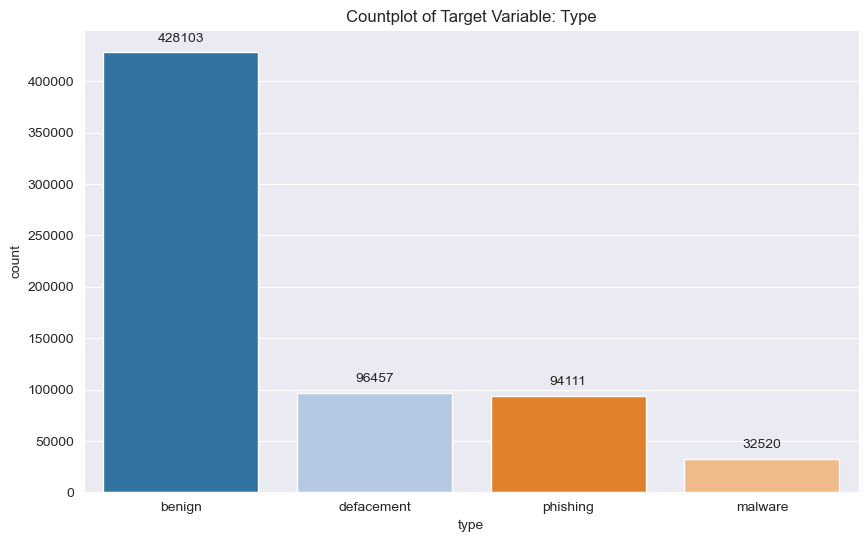

In [9]:
# Countplot
ax = sns.countplot(data=url_df, x='type', palette='tab20', order=url_df['type'].value_counts().index)

# Annotate each bar with its count
for p, label in zip(ax.patches, url_df['type'].value_counts()):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

# Set plot title and show the plot
ax.set_title('Countplot of Target Variable: Type')
plt.show()

In [10]:
feature_chars = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',']

for char in feature_chars:
    url_df[char] = url_df['url'].apply(lambda url: url.count(char))

url_df.sample(10)

,url,type,url_length,protocol,domain,url_type,@,?,-,=,.,#,%,+,$,!,*,","
535447,http://172.245.52.231/x0ox0ox0oxDefault/z0r0.mips,malware,49,Not_Found,172.245.52.231,2,0,0,0,0,4,0,0,0,0,0,0,0
13638,http://cintasmetricas.com/index.html,defacement,36,Not_Found,cintasmetricas,1,0,0,0,0,2,0,0,0,0,0,0,0
209913,movetodc.com/,benign,13,Not_Found,movetodc,0,0,0,0,0,1,0,0,0,0,0,0,0
553785,https://onedrive.live.com/download?cid=470FEBB...,malware,106,Not_Found,live,2,0,1,1,3,2,0,0,0,0,1,0,0
328391,quatchiwatch.wordpress.com/2010/12/16/other-sa...,benign,62,Not_Found,wordpress,0,0,0,2,0,2,0,0,0,0,0,0,0
183284,en.wikipedia.org/wiki/Fabio_Holanda,benign,35,Not_Found,wikipedia,0,0,0,0,0,2,0,0,0,0,0,0,0
208825,rivercoveresidences.review,phishing,26,Not_Found,rivercoveresidences,3,0,0,0,0,1,0,0,0,0,0,0,0
395901,rhf-international.com/results/town/Amelie-les-...,benign,62,Not_Found,rhf-international,0,0,0,4,0,1,0,0,0,0,0,0,0
192232,osha.gov/SLTC/powergeneration/index.html,benign,40,Not_Found,osha,0,0,0,0,0,2,0,0,0,0,0,0,0
389492,stoneriverdachshunds.com/stoneriver_ladies.htm,benign,46,Not_Found,stoneriverdachshunds,0,0,0,0,0,2,0,0,0,0,0,0,0


#### 5. Check whether hostname matches the URL

In [11]:
def abnormal_url(url: str) -> int:
    # Extract hostname from the URL
    hostname = urlparse(url).hostname

    # Convert hostname to a string
    hostname = str(hostname)

    # Search for the hostname in the URL
    match = re.search(hostname, url)

    # Return 1 if a match is found, otherwise return 0
    return 1 if match else 0


In [12]:
url_df['abnormal_url'] = url_df['url'].apply(lambda x: abnormal_url(x))

url_df.sample(10)

,url,type,url_length,protocol,domain,url_type,@,?,-,=,.,#,%,+,$,!,*,",",abnormal_url
205769,youtube.com/watch?v=k5Rbd8nSyGw,benign,31,Not_Found,youtube,0,0,1,0,1,1,0,0,0,0,0,0,0,0
115479,sitemaker.umich.edu/maybaum.pharmacology.princ...,benign,67,Not_Found,umich,0,0,0,0,0,4,0,0,0,0,0,0,0,0
645950,www.gamerz.net/pbmserv/accasta.html,phishing,35,Not_Found,gamerz,3,0,0,0,0,3,0,0,0,0,0,0,0,0
47098,youtube.com/watch?v=8N9mJIk63KM,benign,31,Not_Found,youtube,0,0,1,0,1,1,0,0,0,0,0,0,0,0
240981,en.wikipedia.org/wiki/Fenix_TX_(album),benign,38,Not_Found,wikipedia,0,0,0,0,0,2,0,0,0,0,0,0,0,0
241249,loveforlife.com.au/content/10/02/26/heres-how-...,benign,119,Not_Found,loveforlife,0,0,0,13,0,2,0,0,0,0,0,0,0,0
192502,fanpix.net/gallery/alexandra-stewart-pictures.htm,benign,49,Not_Found,fanpix,0,0,0,2,0,2,0,0,0,0,0,0,0,0
154928,museumstuff.com/learn/topics/Fellow_of_the_Roy...,benign,75,Not_Found,museumstuff,0,0,0,0,0,1,0,0,0,0,0,0,0,0
107670,vintageblackbb.blogspot.com/2009/09/melvin-wel...,benign,53,Not_Found,blogspot,0,0,0,1,0,3,0,0,0,0,0,0,0,0
77277,http://tunein.com/radio/Mixed-Martial-Arts-g27...,benign,94,Not_Found,tunein,0,0,0,5,0,1,0,0,0,0,0,0,0,1


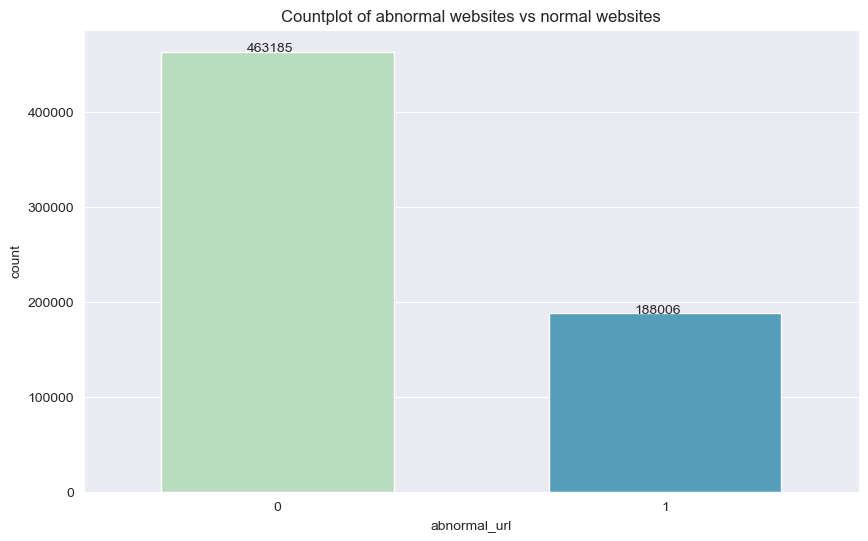

In [13]:
# Countplot
ax = sns.countplot(
    data=url_df, x='abnormal_url', palette='GnBu', width=.6, order=url_df['abnormal_url'].value_counts().index
)

# Annotate each bar with its count
for p, label in zip(ax.patches, url_df['abnormal_url'].value_counts()):
    ax.annotate(label, (p.get_x() + .22, p.get_height() + 1))

# Set plot title
ax.set_title('Countplot of abnormal websites vs normal websites')

# Show the plot
plt.show()

#### Counting the number of numeric and alphanumeric digits

In [14]:
#Count Digits it the URL
def digit_count(url: str) -> int:
    return sum(1 for i in url if i.isnumeric())
#Count Letters in the URL
def letter_count(url: str) -> int:
    return sum(1 for i in url if i.isalpha())


In [15]:
url_df['digits']  = url_df['url'].apply(lambda x: digit_count(x))
url_df['letters'] = url_df['url'].apply(lambda x: letter_count(x))

url_df.sample(10)

,url,type,url_length,protocol,domain,url_type,@,?,-,=,...,#,%,+,$,!,*,",",abnormal_url,digits,letters
469442,zimtelegraph.com/?p=6151,benign,24,Not_Found,zimtelegraph,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4,16
107576,rankings.ft.com/businessschoolrankings/concord...,benign,66,Not_Found,ft,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,60
345424,linkedin.com/pub/dir/chris/thomas,benign,33,Not_Found,linkedin,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28
271009,http://serverfault.com/questions/156225/what-v...,benign,120,Not_Found,serverfault,0,0,0,12,0,...,0,0,0,0,0,0,0,1,6,95
407000,rowohlt-theaterverlag.de/autoren,benign,32,Not_Found,rowohlt-theaterverlag,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,29
246201,allmusic.com/artist/martha-wainwright-p181527,benign,45,Not_Found,allmusic,0,0,0,2,0,...,0,0,0,0,0,0,0,0,6,34
300403,http://www.hauskrankenpflege-duckstein.de/inde...,defacement,99,Not_Found,hauskrankenpflege-duckstein,1,0,1,1,4,...,0,0,0,0,0,0,0,1,4,78
452667,myholidaypictures.coriwsv.gq,phishing,28,Not_Found,coriwsv,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
303179,michael120.com,phishing,14,Not_Found,michael120,3,0,0,0,0,...,0,0,0,0,0,0,0,0,3,10
562807,danskebank-dk.com/verification/cc/457138750903...,benign,191,Not_Found,danskebank-dk,0,0,0,1,0,...,0,0,0,0,0,0,0,0,107,72


#### Checking whether URL uses url shortening services

In [16]:
def shortening_service(url: str) -> int:
    return int(bool(re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                              r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                              r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                              r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                              r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                              r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                              r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                              r'tr\.im|link\.zip\.net', url)))


In [17]:
url_df['shortening_service'] = url_df['url'].apply(lambda x: shortening_service(x))

url_df.sample(10)

,url,type,url_length,protocol,domain,url_type,@,?,-,=,...,%,+,$,!,*,",",abnormal_url,digits,letters,shortening_service
434152,apartments.canada.oodle.com/rosemontla-petitep...,benign,84,Not_Found,oodle,0,0,0,4,0,...,0,0,0,0,0,0,0,0,73,0
382910,ffm-montreal.org/en_marc_copr_tfc_09.html,benign,41,Not_Found,ffm-montreal,0,0,0,1,0,...,0,0,0,0,0,0,0,2,31,0
108432,en.wikipedia.org/wiki/Category:Religious_skeptics,benign,49,Not_Found,wikipedia,0,0,0,0,0,...,0,0,0,0,0,0,0,0,43,0
565006,www.cubesoft.pl/wp-includes/js/plupload/online...,benign,53,Not_Found,cubesoft,0,0,0,1,0,...,0,0,0,0,0,0,0,0,45,0
18616,behindthesteelcurtain.com/2009/1/27/735759/197...,benign,68,Not_Found,behindthesteelcurtain,0,0,0,2,0,...,0,0,0,0,0,0,0,17,43,0
111485,http://www.el-harakat-afghanen.com/index.php?o...,defacement,92,Not_Found,el-harakat-afghanen,1,0,1,2,4,...,0,0,0,0,0,0,1,4,70,0
604674,www.sonifolk.com/iindex.htm,phishing,27,Not_Found,sonifolk,3,0,0,0,0,...,0,0,0,0,0,0,0,0,23,0
519250,baseball-almanac.com/teamstats/roster.php?y=19...,benign,54,Not_Found,baseball-almanac,0,0,1,1,2,...,0,0,0,0,0,0,0,4,41,0
362442,http://www.mdgachievers.com/index.php?option=c...,defacement,87,Not_Found,mdgachievers,1,0,1,0,4,...,0,0,0,0,0,0,1,6,65,0
512505,http://thenextweb.com/insider/2015/05/08/explo...,benign,105,Not_Found,thenextweb,0,0,0,11,0,...,0,0,0,0,0,0,1,8,75,0


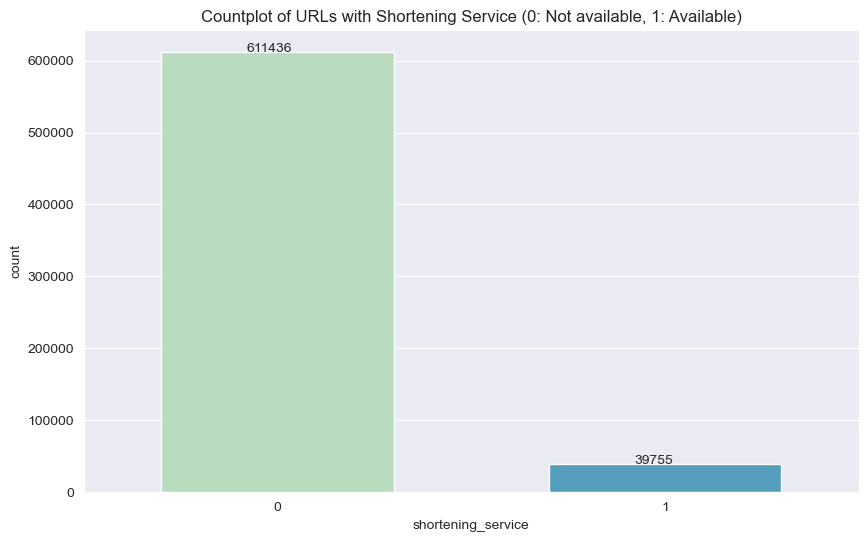

In [18]:
# Countplot for shortening service
ax = sns.countplot(
    data=url_df, 
    x='shortening_service', 
    palette='GnBu',
    order=url_df['shortening_service'].value_counts().index,
    width=.6
)

# Annotate each bar with its count
for p, label in zip(ax.patches, url_df['shortening_service'].value_counts()):
    ax.annotate(label, (p.get_x() + .22, p.get_height() + 1))

# Set plot title and show the plot
ax.set_title('Countplot of URLs with Shortening Service (0: Not available, 1: Available)')
plt.show()

#### Check whether URL contains IP Address

In [19]:
import ipaddress

def having_ip_address(url: str) -> int:
    # Extract potential IP addresses using a regular expression
    ip_matches = re.findall(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', url)

    # Check if any of the extracted matches are valid IP addresses
    for ip_match in ip_matches:
        try:
            ipaddress.ip_address(ip_match)
            return 1
        except ValueError:
            pass

    # If no valid IP addresses found, return 0
    return 0

In [20]:
url_df['has_ip_address'] = url_df['url'].apply(lambda x: having_ip_address(x))
url_df.sample(10)

,url,type,url_length,protocol,domain,url_type,@,?,-,=,...,+,$,!,*,",",abnormal_url,digits,letters,shortening_service,has_ip_address
173246,yelp.ca/biz/centre-bell-montreal,benign,32,Not_Found,yelp,0,0,0,2,0,...,0,0,0,0,0,0,0,27,0,0
72824,buenos-aires-aep-airport.webport.com/,benign,37,Not_Found,webport,0,0,0,3,0,...,0,0,0,0,0,0,0,31,1,0
483687,songlyrics.com/cryptopsy/worship-your-demons-l...,benign,52,Not_Found,songlyrics,0,0,0,3,0,...,0,0,0,0,0,0,0,45,0,0
15732,metacafe.com/watch/1618770/vanessa_angel_kingpin/,benign,49,Not_Found,metacafe,0,0,0,0,0,...,0,0,0,0,0,0,7,35,0,0
12109,ebay.com/sch/sis.html?_nkw=Avon+Precious+Doe+S...,benign,82,Not_Found,ebay,0,0,1,0,1,...,8,0,0,0,0,0,0,67,0,0
442576,apu.edu/athletics/baseball/stories/10506/,benign,41,Not_Found,apu,0,0,0,0,0,...,0,0,0,0,0,0,5,30,0,0
646846,gamecabinet.com/rules/HighSociety.html,phishing,38,Not_Found,gamecabinet,3,0,0,0,0,...,0,0,0,0,0,0,0,34,1,0
581970,52995paypal39442.techniicall.com/6018740820529...,benign,130,Not_Found,techniicall,0,0,1,0,1,...,0,0,0,0,0,0,80,45,0,0
198495,http://www.italy-itf.com/index.php?option=com_...,defacement,187,Not_Found,italy-itf,1,0,1,9,7,...,0,0,0,0,0,1,14,140,0,0
210867,outriderbooks.com/bks/DudeRanchinginYellowston...,benign,59,Not_Found,outriderbooks,0,0,0,0,0,...,0,0,0,0,0,0,0,55,0,0


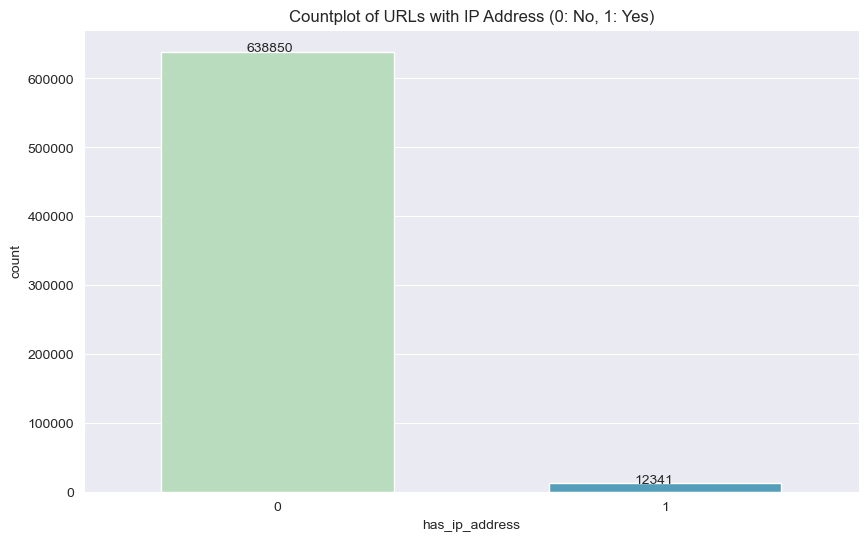

In [21]:
# Countplot for 
ax = sns.countplot(
    data=url_df, 
    x=url_df['has_ip_address'],  # Apply the function to each URL in the DataFrame
    palette='GnBu',
    order=url_df['has_ip_address'].value_counts().index,
    width=.6
)

# Annotate each bar with its count
for p, label in zip(ax.patches, url_df['has_ip_address'].value_counts()):
    ax.annotate(label, (p.get_x() + .22, p.get_height() + 1))

# Set plot title and show the plot
ax.set_title('Countplot of URLs with IP Address (0: No, 1: Yes)')
plt.show()


#### Checking whether url is google indexed

In [22]:
!pip install googlesearch-python
!pip install selenium

In [23]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By

# def google_index(url):
#     try:
#         options = webdriver.ChromeOptions()
#         options.add_argument('--headless')  # Run Chrome in headless mode
#         driver = webdriver.Chrome(options=options)

#         # Perform Google search
#         driver.get(f'https://www.google.com/search?q={url}')
#         result = driver.find_elements(By.CSS_SELECTOR, 'div.g')

#         driver.quit()  # Close the browser

#         return 1 if result else 0
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         return 0

# url_df['google_index'] = url_df['url'].apply(google_index)

In [24]:
#url_df.sample(10)

## Correlation Plot: HeatMap 

/home/antony/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


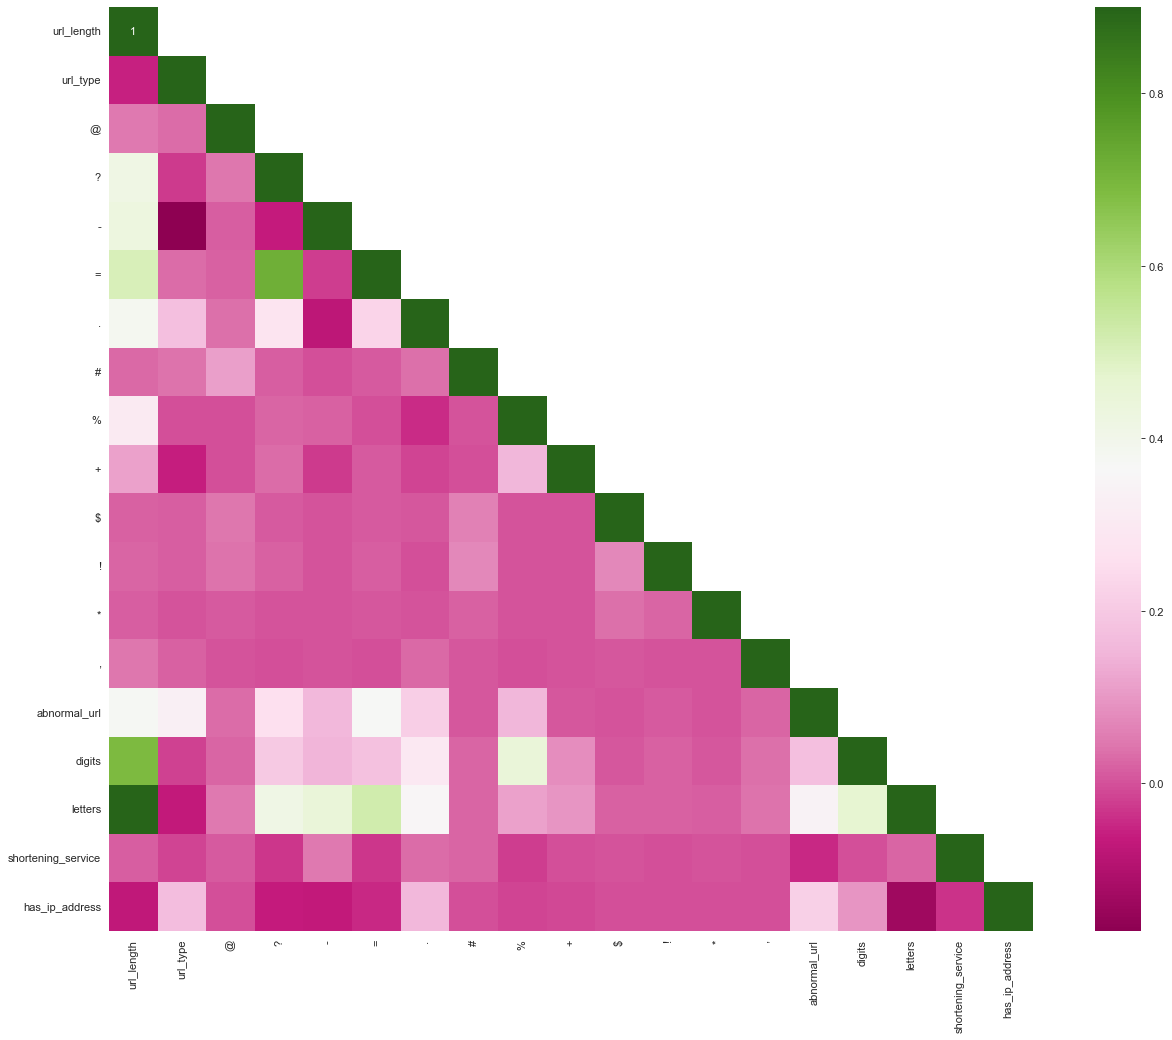

In [25]:
numeric_cols = [
    col for col in url_df.columns if url_df[col].dtype in ['int64', 'float64']
]

corr = url_df[numeric_cols].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False

sns.set_style('whitegrid')  # I like heatmap on a white background
plt.figure(figsize=(20, 15), dpi=80)
sns.heatmap(corr, mask=mask, square=True, annot=True, vmax=.9, cmap='PiYG')
plt.grid(False)
plt.show()

## Feature Selection

In [26]:
# ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score, f1_score,auc, recall_score, roc_auc_score, average_precision_score, roc_curve,precision_recall_curve, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance

In [27]:
target = url_df[numeric_cols].pop('url_type')
inputs = url_df[numeric_cols].drop(columns='url_type', axis=1)

In [28]:
print(url_df.columns)

Index(['url', 'type', 'url_length', 'protocol', 'domain', 'url_type', '@', '?',
       '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', 'abnormal_url',
       'digits', 'letters', 'shortening_service', 'has_ip_address'],
      dtype='object')


In [29]:
url_df[inputs.columns.to_list()] = StandardScaler().fit_transform(url_df[inputs.columns.to_list()])
url_df[inputs.columns.to_list()] 

,url_length,@,?,-,=,.,#,%,+,$,!,*,",",abnormal_url,digits,letters,shortening_service,has_ip_address
0,-0.986660,-0.040954,-0.507190,-0.185091,-0.398075,-0.131112,-0.026935,-0.116422,-0.110147,-0.01011,-0.024114,-0.005267,-0.031644,-0.637101,-0.472396,-1.019688,-0.254988,-0.138987
1,-0.562115,-0.040954,-0.507190,-0.521362,-0.398075,-0.131112,-0.026935,-0.116422,-0.110147,-0.01011,-0.024114,-0.005267,-0.031644,-0.637101,-0.386931,-0.513751,-0.254988,-0.138987
2,-0.651493,-0.040954,-0.507190,-0.521362,-0.398075,-0.131112,-0.026935,-0.116422,-0.110147,-0.01011,-0.024114,-0.005267,-0.031644,-0.637101,-0.386931,-0.640235,-0.254988,-0.138987
3,0.622140,-0.040954,1.759256,-0.185091,2.238780,0.539700,-0.026935,-0.116422,-0.110147,-0.01011,-0.024114,-0.005267,-0.031644,1.569609,0.125854,0.561366,-0.254988,-0.138987
4,3.906772,-0.040954,1.759256,-0.185091,1.579567,-0.131112,-0.026935,-0.116422,-0.110147,-0.01011,-0.024114,-0.005267,-0.031644,1.569609,1.407817,4.861832,-0.254988,-0.138987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,-0.472737,-0.040954,-0.507190,-0.521362,-0.398075,0.539700,-0.026935,-0.116422,-0.110147,-0.01011,-0.024114,-0.005267,-0.031644,-0.637101,0.553175,-0.766720,-0.254988,-0.138987
651187,-0.361015,-0.040954,-0.507190,0.151181,-0.398075,-0.131112,-0.026935,-0.116422,-0.110147,-0.01011,-0.024114,-0.005267,-0.031644,-0.637101,0.125854,-0.513751,3.921747,-0.138987
651188,-0.405704,-0.040954,-0.507190,-0.521362,-0.398075,-0.131112,-0.026935,-0.116422,-0.110147,-0.01011,-0.024114,-0.005267,-0.031644,-0.637101,-0.216003,-0.387267,3.921747,-0.138987
651189,-0.338671,-0.040954,-0.507190,-0.521362,-0.398075,-0.131112,-0.026935,-0.116422,-0.110147,-0.01011,-0.024114,-0.005267,-0.031644,-0.637101,-0.472396,-0.292403,-0.254988,-0.138987


In [30]:
train_inputs, test_inputs, train_target, test_target = split(
    url_df[inputs.columns], url_df.url_type, test_size=.40, stratify=url_df.url_type, random_state=42)
print(
    f"Train shape: {train_inputs.shape} | Train target shape: {train_target.shape}", 
    f"Test shape: {test_inputs.shape} | Test target shape: {test_target.shape}", 
    sep="\n",
)

Train shape: (390714, 18) | Train target shape: (390714,)
Test shape: (260477, 18) | Test target shape: (260477,)


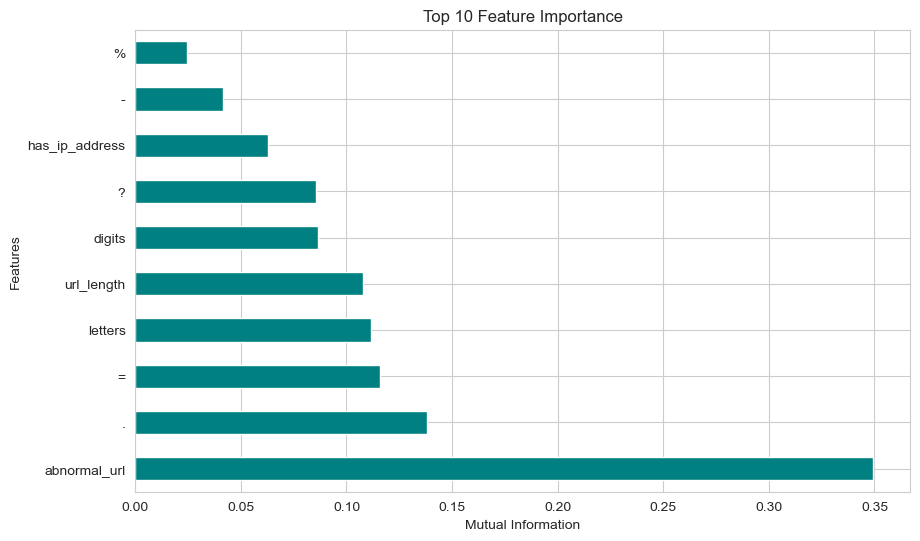

In [31]:
# Feature Importance
importances = mutual_info_classif(train_inputs, train_target)
feat_importances = pd.Series(importances, index=train_inputs.columns).sort_values(ascending=False)

# Selecting the top N features
top_n = 10
selected_features = feat_importances[:top_n].index
selected_train_inputs = train_inputs[selected_features]
selected_test_inputs = test_inputs[selected_features]

# Plotting
feat_importances[:top_n].plot(kind='barh', color='teal')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title(f'Top {top_n} Feature Importance')
plt.show()


In [32]:
print(selected_features)

Index(['abnormal_url', '.', '=', 'letters', 'url_length', 'digits', '?',
       'has_ip_address', '-', '%'],
      dtype='object')


## Prediction Models

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_curve, auc

In [43]:
# Split data into features and target variable
X = url_df[selected_features]
y = url_df[numeric_cols].pop('url_type')

# Encode categorical target variable if needed
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### XG Boost

In [44]:
# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8975498890501309


In [46]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Predict probabilities for each class on the test set
y_pred_proba = model.predict_proba(X_test)
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
# Compute precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8975498890501309
Precision: 0.8913249374470116
Recall: 0.8975498890501309
F1 Score: 0.8911322695304614
ROC-AUC Score: 0.9711282706778246

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     85778
           1       0.88      0.95      0.92     19104
           2       0.93      0.83      0.88      6521
           3       0.76      0.54      0.63     18836

    accuracy                           0.90    130239
   macro avg       0.87      0.82      0.84    130239
weighted avg       0.89      0.90      0.89    130239



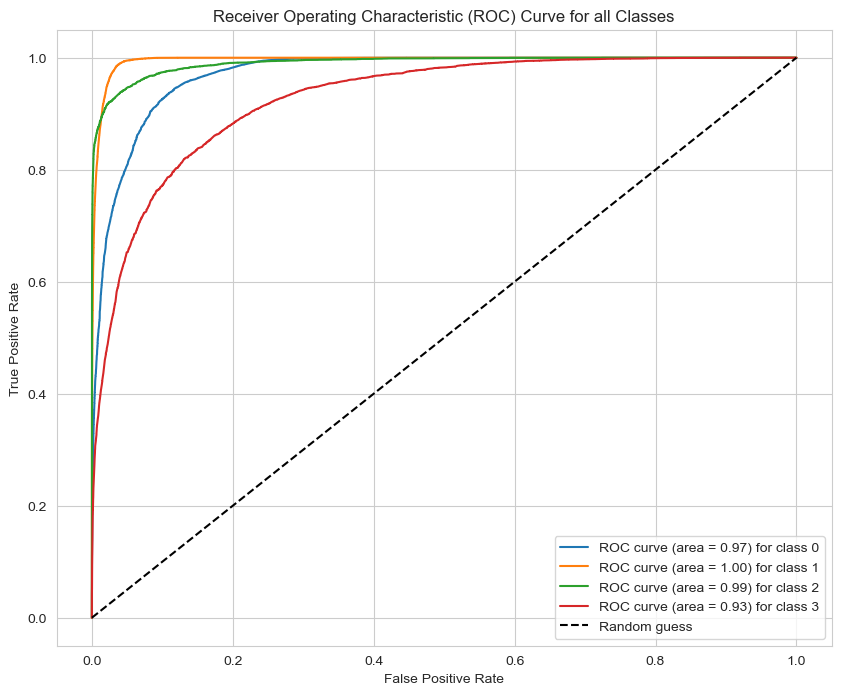

In [47]:
# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for all Classes')
plt.legend(loc="lower right")
plt.show()

### Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9189259745544729
Precision: 0.9156305842502086
Recall: 0.9189259745544729
F1 Score: 0.9163421499446671
ROC-AUC Score: 0.9758679166691503

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     85778
           1       0.92      0.96      0.94     19104
           2       0.95      0.90      0.93      6521
           3       0.78      0.66      0.72     18836

    accuracy                           0.92    130239
   macro avg       0.90      0.87      0.88    130239
weighted avg       0.92      0.92      0.92    130239



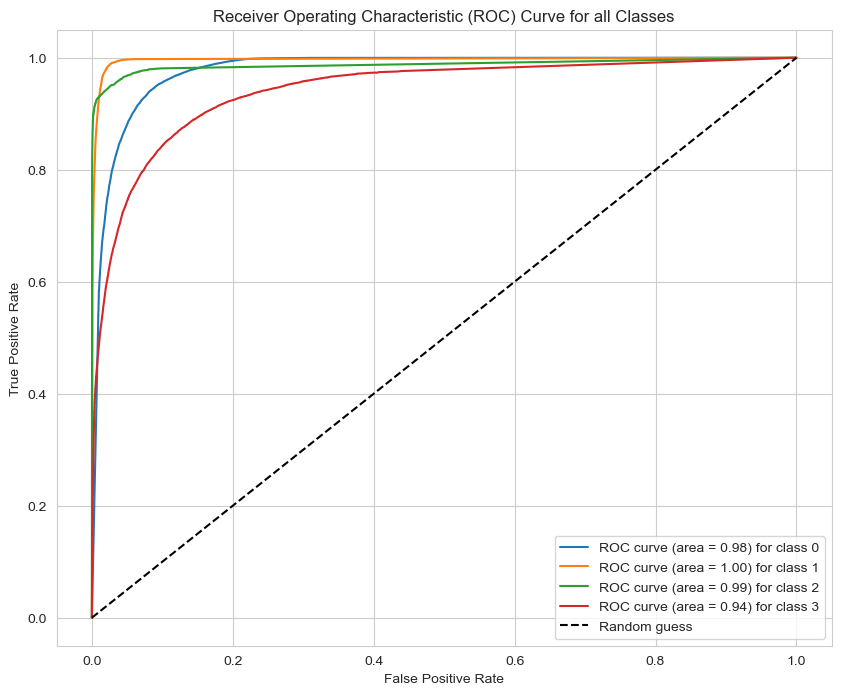

In [49]:
# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for all Classes')
plt.legend(loc="lower right")
plt.show()